## Read the train, validation and test Datasets

In [1]:
import numpy as np
import pandas as pd

train      = pd.read_csv('C:/Users/Shankeerthan/Desktop/DATA STORM 2021/updated data/train.csv')
validation = pd.read_csv('C:/Users/Shankeerthan/Desktop/DATA STORM 2021/updated data/validation.csv')
test       = pd.read_csv('C:/Users/Shankeerthan/Desktop/DATA STORM 2021/updated data/test.csv')

## Data preprocessing

In [2]:
Change_values = {'Gender':{'M':1, 'F':0},
                'Ethnicity':{'Latino':3,'African American':2,'Asian American':1, 'caucasian':0},
                'Educational_Level':{'Mid-School':0,'High-School':1,'College':2,'Grad':3},
                'Income':{'<25K':0,'25K --50K':1,'50K -- 100K':2,'>100K':3},
                'Country_region':{'North':3,'South':2,'East':1,'West':0},
                'Hotel_Type':{'City Hotel':2,'Airport Hotels':1,'Resort':0},
                'Meal_Type':{'BB':0,'HB':1,'FB':2},
                'Visted_Previously':{'Yes':1,'No':0},
                'Previous_Cancellations':{'Yes':1,'No':0},
                'Deposit_type':{'Refundable':2,'Non-Refundable':1, 'No Deposit':0},
                'Booking_channel':{'Direct':2,'Agent':1,'Online':0},
                'Required_Car_Parking':{'Yes':1,'No':0},
                'Reservation_Status':{'Check-In':2,'Canceled':1,'No-Show':0},
                'Use_Promotion':{'Yes':1,'No':0},
                }

train.replace(Change_values, inplace=True)
validation.replace(Change_values, inplace=True)
test.replace(Change_values, inplace=True)

train.pop('Expected_checkin')
train.pop('Expected_checkout')
train.pop('Booking_date')

validation.pop('Expected_checkin')
validation.pop('Expected_checkout')
validation.pop('Booking_date')

test.pop('Expected_checkin')
test.pop('Expected_checkout')
test.pop('Booking_date')

index_t=train.pop('Reservation-id')
label_t=train.pop('Reservation_Status')

index_v=validation.pop('Reservation-id')
label_v=validation.pop('Reservation_Status')

index_te=test.pop('Reservation-id')

## Describe the train dataset

In [3]:
train.describe()

,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Adults,Children,Babies,...,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate,Expected_days_spend,Booked_before_checkin
count,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,...,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000
mean,0.498200,43.977454,1.497727,1.598531,1.294738,1.611113,1.000982,2.333576,1.743882,0.351540,...,0.332921,0.113459,0.590531,0.722463,0.713808,0.751664,12.495182,175.136478,1.836212,109.910906
std,0.500006,15.303148,1.116310,1.017302,1.028755,1.023032,0.814467,1.176526,0.721972,0.573326,...,0.471267,0.317158,0.865897,0.882134,0.451989,0.432056,11.206036,43.877087,0.985204,78.048838
min,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,1.000000,-4.000000
25%,0.000000,31.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,137.000000,1.000000,45.000000
50%,0.000000,44.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,10.000000,175.000000,2.000000,101.000000
75%,1.000000,57.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000,...,1.000000,0.000000,2.000000,2.000000,1.000000,1.000000,20.000000,214.000000,2.000000,166.000000
max,1.000000,70.000000,3.000000,3.000000,3.000000,3.000000,2.000000,5.000000,3.000000,2.000000,...,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,40.000000,250.000000,4.000000,708.000000


## Plot the correlation matrix of features

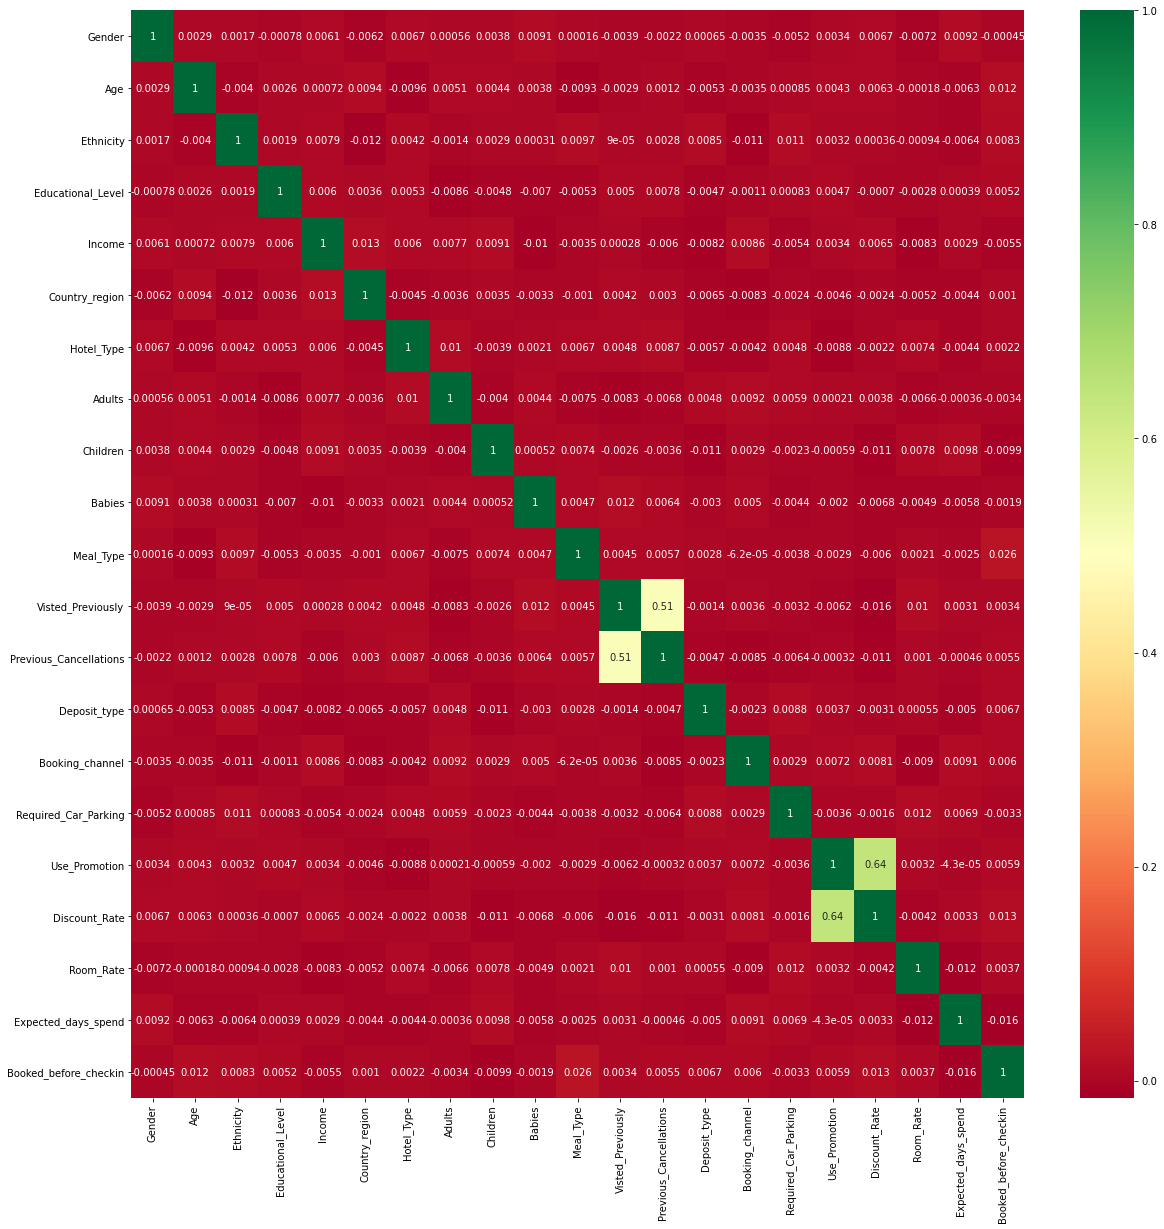

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

corrmatgraph=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")
figure = corrmatgraph.get_figure()    
figure.savefig('data_corr.png', dpi=400)

## Build the xgboost model for multiclass classification

In [5]:
import xgboost as xgb
from sklearn.datasets import dump_svmlight_file

dtrain = xgb.DMatrix(train, label=label_t)
dvalidation = xgb.DMatrix(validation, label=label_v)

param = {
    'max_depth':4 ,  
    'eta': 0.3, 
    'silent':1,  
    'objective': 'multi:softprob',  
    'num_class': 3}  
epochs = 1000 

bst = xgb.train(param, dtrain, epochs)

## Calculate f1 score for validation dataset using above model

In [6]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

preds = bst.predict(dvalidation)
best_preds = np.asarray([np.argmax(line) for line in preds])

print(f1_score(label_v, best_preds, average='macro'))

0.2828283235190285


## Get best predictions for test dataset

In [7]:
dtest = xgb.DMatrix(test)
preds = bst.predict(dtest)
best_preds = np.asarray([np.argmax(line) for line in preds])

## Write predictions to csv

In [8]:
Reservation_Status=pd.DataFrame(best_preds,columns=['Reservation_Status'])
change_v = {'Reservation_Status':{2:1,1:2,0:3}}
Reservation_Status.replace(change_v, inplace=True)

submit = pd.read_csv('C:/Users/Shankeerthan/Desktop/Data Storm 2021/submit.csv')
submit=pd.concat([submit,Reservation_Status],axis=1)
export_csv=submit.to_csv('C:/Users/Shankeerthan/Desktop/Data Storm 2021/submit.csv',index=None)